In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import os
import sys
module_path = os.path.abspath(os.path.join('../../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

/home/edgaregurrola/Repos/observatorio-ciudades/accesibilidad-urbana/aup/data.py:24: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  ox.config(


In [2]:
grl_dir = '../../../data/processed/santiago/'

## Area of analysis

In [3]:
santiago_aoi = aup.gdf_from_db('santiago_aoi','projects_research')

In [4]:
alameda = gpd.read_file(grl_dir + 'buffer 800m nueva alameda.shp')

In [5]:
poniente = gpd.read_file(grl_dir + 'alameda_poniente.gpkg')

In [6]:
oriente = gpd.read_file(grl_dir + 'alameda_oriente.gpkg')

In [7]:
santiago_viv = gpd.read_file(grl_dir + 'viv_area.gpkg')

In [8]:
alameda_ext = gpd.read_file(grl_dir + 'extended_alameda_800m_buffer.gpkg')

## Hexagons

In [9]:
query = 'SELECT * FROM projects_research.santiago_hexproximity_4_5_kmh WHERE res = 9'

In [10]:
hex_gdf = aup.gdf_from_query(query)

In [11]:
print(hex_gdf.shape)
hex_gdf.head(2)

(30073, 147)


,hex_id,geometry,supermercado_time,supermercado_count_15min,clinica_priv_time,clinica_priv_count_15min,clinica_pub_time,clinica_pub_count_15min,hospital_priv_time,hospital_priv_count_15min,...,errands_paperwork_count,fresh_air_count,living_count,culture_count,entertainment_count,enjoying_count,education_count,learning_count,sustainable_mobility_count,working_count
0,89b2c555d6fffff,"POLYGON ((-70.68506 -33.47780, -70.68624 -33.4...",25.291604,0.0,34.672710,0.0,6.781640,1.147059,44.117349,0.0,...,0.020597,0.489852,0.510449,0.013164,0.016145,0.029309,0.365348,0.365348,1.291655,1.291655
1,89b2c555d73ffff,"POLYGON ((-70.68452 -33.47211, -70.68570 -33.4...",21.800260,0.0,35.931313,0.0,12.419056,2.052632,46.377087,0.0,...,0.000000,0.261459,0.261459,0.015434,0.007723,0.023157,0.376473,0.376473,1.275023,1.275023


## Summary table

In [12]:
df_summary = pd.read_csv(grl_dir + 'source_matrix.csv', encoding='iso-8859-1')
df_summary.head(2)

,Function,Theme,Indicator,Variable,Source name
0,Supplies,GROCERIES,Specific supply,Butcher/Fish Shops,carniceria
1,Supplies,GROCERIES,Specific supply,Hardware/ Paint stores,hogar


## HQSL

In [13]:
parameters_dict = {'supplies':{'groceries':['carniceria','hogar','local_mini_market','ferias','supermercado']},
                   'caring':{'health':['clinica_priv','clinica_pub','hospital_priv','hospital_pub','consult_ado_priv','consult_ado_pub','residencia_adumayor','farmacia'],
                            'exercise':['club_deportivo','eq_deportivo_pub','eq_deportivo_priv']},
                   'living':{'errands_paperwork':['civic_office','tax_collection','social_security','banco'],
                             'fresh_air':['ep_plaza_small','ep_plaza_big']},
                   'enjoying':{'culture':['museos_priv','museos_pub','bibliotecas','sitios_historicos'],
                               'entertainment':['cines','librerias','restaurantes_bar_cafe']},
                   'learning':{'education':['edu_basica_priv','edu_basica_pub','edu_media_priv','edu_media_pub','jardin_inf_pub','jardin_inf_priv','edu_especial_priv','edu_especial_pub']},
                   'working':{'sustainable_mobility':['ciclovias','paradas_tp','paradas_tp_tren','paradas_tp_metro']}}

social_fn_cols = []

for k in parameters_dict.keys():
    social_fn_cols.append(k+'_count')

<AxesSubplot: >

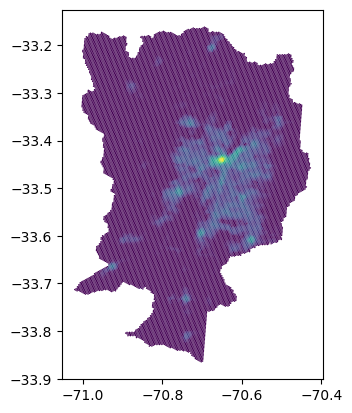

In [14]:
hex_gdf['hqsl'] = hex_gdf[social_fn_cols[0]] + hex_gdf[social_fn_cols[1]] + hex_gdf[social_fn_cols[2]] + hex_gdf[social_fn_cols[3]] + hex_gdf[social_fn_cols[4]] + hex_gdf[social_fn_cols[5]]
hex_gdf.plot('hqsl')

<AxesSubplot: >

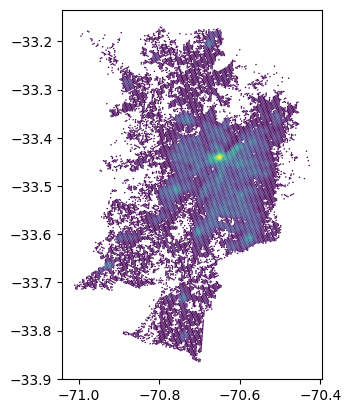

In [15]:
hex_gdf = hex_gdf.loc[hex_gdf.supermercado_time>0].copy()
hex_gdf.plot('hqsl')

### Statistical summary

In [16]:
summary_cols = social_fn_cols
if 'hqsl' not in summary_cols:
    summary_cols.append('hqsl')

In [17]:
for sc in summary_cols:
    hex_gdf[sc] = 5 * (hex_gdf[sc] - hex_gdf[sc].min()) / (hex_gdf[sc].max() - hex_gdf[sc].min())

In [18]:
hex_gdf[summary_cols].describe()

,supplies_count,caring_count,living_count,enjoying_count,learning_count,working_count,hqsl
count,16915.000000,16915.000000,16915.000000,16915.000000,16915.000000,16915.000000,16915.000000
mean,0.368152,0.322691,0.317835,0.072301,0.436345,0.418347,0.351287
std,0.580246,0.504693,0.438611,0.242019,0.621542,0.647339,0.495568
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001060
50%,0.036444,0.049802,0.087034,0.000000,0.075732,0.077632,0.074152
75%,0.608077,0.525560,0.554325,0.022567,0.781130,0.695790,0.645431
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [19]:
df_summary['res_value'] = np.nan

for source in df_summary['Source name']:
    if pd.isna(source):
        continue
    for col in hex_gdf.columns:
        # print(col)
        if source in col and 'scaled' in col:
            df_summary.loc[df_summary['Source name']==source, 'res_value'] = hex_gdf[col].mean()
df_summary

,Function,Theme,Indicator,Variable,Source name,res_value
0,Supplies,GROCERIES,Specific supply,Butcher/Fish Shops,carniceria,0.055679
1,Supplies,GROCERIES,Specific supply,Hardware/ Paint stores,hogar,0.028947
2,Supplies,GROCERIES,Specific supply,Bakeries and delis,bakeries,0.026648
3,Supplies,GROCERIES,General supply,Local and mini markets,local_mini_market,0.024828
4,Supplies,GROCERIES,General supply,CIty fairs,ferias,0.096211
5,Supplies,GROCERIES,General supply,Supermarkets,supermercado,0.050198
6,Caring,HEALTH,Health care,Neighborhood clinics,clinica_priv,0.017206
7,Caring,HEALTH,Health care,NaN,clinica_pub,0.077199
8,Caring,HEALTH,Health care,Hospitals,hospital_priv,0.004616
9,Caring,HEALTH,Health care,NaN,hospital_pub,0.008244


## Filter data by spatial area

In [20]:
hex_gdf['area_ha'] = hex_gdf.to_crs("EPSG:32719").area / 10000

In [21]:
aoi = santiago_viv.to_crs("EPSG:4326")
area = 'Santiago_household'

In [22]:
hex_clip = gpd.clip(hex_gdf, aoi)
hex_clip['area_clip'] = hex_clip.to_crs("EPSG:32719").area / 10000
hex_clip['area_pct'] = hex_clip['area_clip'] / hex_clip['area_ha']
hex_clip = hex_clip.loc[hex_clip.area_pct>=0.1].copy()

In [23]:
hex_list = list(hex_clip.hex_id.unique())
# hex_list = list(hex_gdf.hex_id.unique())

<AxesSubplot: >

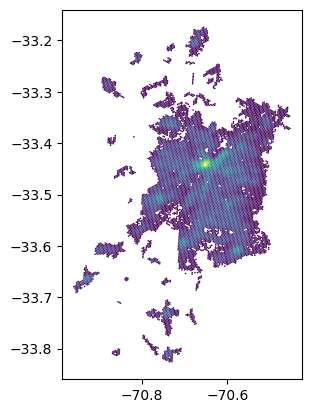

In [24]:
hex_gdf.loc[hex_gdf.hex_id.isin(hex_list)].plot('hqsl')

### Statistics by spatial area

In [25]:
hex_gdf.loc[hex_gdf.hex_id.isin(hex_list),summary_cols].describe()

,supplies_count,caring_count,living_count,enjoying_count,learning_count,working_count,hqsl
count,9685.000000,9685.000000,9685.000000,9685.000000,9685.000000,9685.000000,9685.000000
mean,0.629789,0.548775,0.541638,0.123331,0.745278,0.706452,0.598438
std,0.649474,0.565653,0.460893,0.306912,0.668293,0.727053,0.530451
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.089084,0.061290,0.183939,0.000000,0.170794,0.094159,0.138815
50%,0.475708,0.421762,0.471756,0.012177,0.636503,0.535080,0.533904
75%,0.970425,0.877595,0.803863,0.117017,1.188556,1.090022,0.921224
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### Statistical summary

In [26]:
df_summary['res_value'] = np.nan

for source in df_summary['Source name']:
    if pd.isna(source):
        continue
    for col in hex_gdf.columns:
        # print(col)
        if source in col and 'scaled' in col:
            df_summary.loc[df_summary['Source name']==source, 'res_value'] = hex_gdf.loc[hex_gdf.hex_id.isin(hex_list),col].mean()
df_summary

,Function,Theme,Indicator,Variable,Source name,res_value
0,Supplies,GROCERIES,Specific supply,Butcher/Fish Shops,carniceria,0.095271
1,Supplies,GROCERIES,Specific supply,Hardware/ Paint stores,hogar,0.048471
2,Supplies,GROCERIES,Specific supply,Bakeries and delis,bakeries,0.045704
3,Supplies,GROCERIES,General supply,Local and mini markets,local_mini_market,0.042379
4,Supplies,GROCERIES,General supply,CIty fairs,ferias,0.165715
5,Supplies,GROCERIES,General supply,Supermarkets,supermercado,0.085746
6,Caring,HEALTH,Health care,Neighborhood clinics,clinica_priv,0.029616
7,Caring,HEALTH,Health care,NaN,clinica_pub,0.131145
8,Caring,HEALTH,Health care,Hospitals,hospital_priv,0.007494
9,Caring,HEALTH,Health care,NaN,hospital_pub,0.014043


### Save data

In [27]:
hex_gdf.loc[hex_gdf.hex_id.isin(hex_list)].to_file(f'../../../output/data/santiago/SocialFunctions_{area}.geojson')

### Polar graph

In [28]:
import textwrap
import matplotlib.patheffects as pe
from matplotlib.lines import Line2D

In [29]:
import math #importing the math functions

pi = math.pi

In [30]:
gdf_polar = hex_gdf.loc[hex_gdf.hex_id.isin(hex_list),social_fn_cols].mean(axis=0)
df = gdf_polar.copy()

In [31]:
df = pd.DataFrame(df).reset_index()
df.index = [0]*len(df)
df = df.rename(columns={'index':'social_fn',0:'value'})
df = df.pivot(columns='social_fn', values='value')

In [32]:
def make_spider(df, row, color, title, alpha, linewidth, zorder):
    
    categories=list(df)[0:]
    N = len(categories)

    
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
     
    plt.rc('figure', figsize=(5, 5), )
 
    ax = plt.subplot(1,1,1, polar=True, )
 
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
 
   
    plt.xticks(angles[:-1], categories, color='black', size=8,zorder=10)
    ax.tick_params(axis='x', rotation=0,pad=18, zorder=10)
    # ax.set_xlabel(labelpad=10)
    
    ax.set_rlabel_position(0)
    plt.yticks([1,2,3,4,5], ['1','2','3','4','5'], color="black", size=10, zorder=10)
    plt.ylim(0,5)
     
    
    values=df.reset_index().loc[row].values.tolist()[1:]
    values += values[:1]
    ax.plot(angles, values, color = color, linewidth=linewidth, linestyle='solid')
    ax.fill(angles, values, color = color, alpha = alpha, zorder=zorder)
         
    wrap_labels(ax, 15, 0)
  
    # title = "Radar showing performance in each subject for "+ title
    # plt.title(title, fontsize=20, x = 0.5, y = 1.1)

In [33]:
def wrap_labels(ax, width, rotation, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=rotation, )

In [34]:
import matplotlib.pyplot as plt

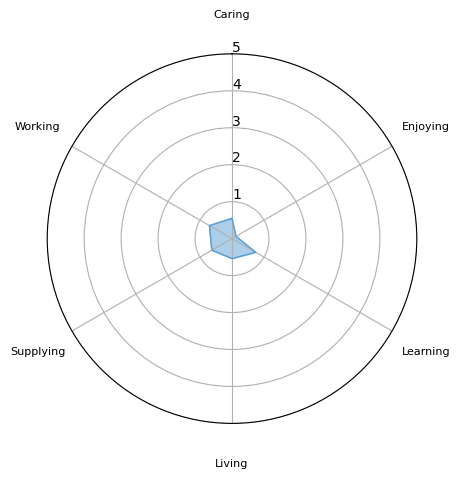

In [35]:
plt.figure()

color = '#599fd5'
df = df.rename(columns={'caring_count':'Caring',
                       'working_count':'Working',
                       'enjoying_count':'Enjoying',
                       'supplies_count':'Supplying',
                        'living_count':'Living',
                        'learning_count':'Learning'})
make_spider(row=0, df = df.drop(columns='hqsl'), title ='Ciudad' , 
            color = color, alpha=0.5, linewidth=1, zorder=-1)

plt.savefig(f'../../../output/figures/santiago/SocialFunctions_{area}.svg')